In [1]:
import pickle
import seaborn as sns
import numpy as np
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database, drop_database
import matplotlib.pyplot as plt

In [95]:
sns.set_style('whitegrid')

small_size = 18
medium_size = 20
bigger_size = 22

plt.rc('font', size=small_size)          # controls default text sizes
plt.rc('axes', titlesize=small_size)     # fontsize of the axes title
plt.rc('axes', labelsize=medium_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=small_size)    # legend fontsize
plt.rc('figure', titlesize=bigger_size)  # fontsize of the figure title

In [3]:
with open('pg_credentials.p', 'rb') as f:
    pg_credentials = pickle.load(f)

In [4]:
host     = 'localhost'
db_name  = 'goodreads_db'
username = pg_credentials['username']
password = pg_credentials['password']
port = '5432'  # default port that postgres listens on
    
con = psycopg2.connect(database = db_name, user = username, host=host, password=password)

In [5]:
query = "SELECT shelf, SUM(nshelves) AS total FROM shelves GROUP BY shelf;"
shelf_data = pd.read_sql_query(query, con)

In [6]:
shelf_data = shelf_data.sort_values(by='total', ascending=False)

In [7]:
shelf_data

,shelf,total
18399,to-read,115288406.0
37457,currently-reading,6354957.0
3062,fantasy,4272390.0
40457,favorites,2747141.0
2812,fiction,1790375.0
...,...,...
10698,known,-16.0
14693,libiris,-17.0
33708,wanted_old,-17.0
43011,entered-in-giveaway,-19.0


In [8]:
print(shelf_data.iloc[0:30])

                   shelf        total
18399            to-read  115288406.0
37457  currently-reading    6354957.0
3062             fantasy    4272390.0
40457          favorites    2747141.0
2812             fiction    1790375.0
2685         young-adult    1416877.0
10008    science-fiction    1311665.0
35634             sci-fi    1036722.0
25502                own     884417.0
32546              owned     815308.0
33793        books-i-own     759542.0
368                   ya     655569.0
43610           classics     606947.0
10104             series     487665.0
26106             horror     398973.0
36130            romance     396006.0
40353          dystopian     364736.0
50053               2018     322223.0
5204            dystopia     314163.0
7690                2017     299780.0
48422               2016     281069.0
10665         favourites     276072.0
16435         paranormal     268396.0
325                 2019     254004.0
23763          audiobook     247409.0
8886        

In [9]:
print(shelf_data.iloc[30:60])

                    shelf     total
26668               scifi  213566.0
15791            wishlist  207201.0
34968      sci-fi-fantasy  205699.0
4637              library  201100.0
11781       urban-fantasy  200522.0
44717          audiobooks  200316.0
4491                magic  190988.0
17430             default  177237.0
8451                 2013  169589.0
28513              to-buy  166499.0
21403               ebook  158692.0
36381            vampires  143159.0
6732              mystery  130597.0
38700               audio  125893.0
12736                2012  124452.0
43278            my-books  122238.0
33315  historical-fiction  120547.0
9247                adult  113800.0
28555        stephen-king  113159.0
26120              novels  112300.0
3262            childrens  109452.0
34724             classic  108265.0
11662      fantasy-sci-fi  103387.0
5813            book-club  100983.0
49412              ebooks  100694.0
42912                  sf   96067.0
30694                 dnf   

In [10]:
print(shelf_data.iloc[60:90])

                    shelf    total
30620             re-read  89332.0
32936               i-own  88144.0
3986           ya-fantasy  87049.0
42450            thriller  83380.0
33225                2011  79647.0
18270                teen  78008.0
45789        high-fantasy  77744.0
17917       scifi-fantasy  76235.0
15784           star-wars  74853.0
15967               humor  74733.0
46355           mythology  74547.0
46404            children  74203.0
36661        harry-potter  73016.0
38249        middle-grade  72163.0
30527             audible  67471.0
933          read-in-2018  67346.0
39241  all-time-favorites  66769.0
35763  paranormal-romance  66212.0
31662             5-stars  65267.0
47565        read-in-2016  65043.0
22710              comics  64865.0
39855        read-in-2017  64810.0
16827           wish-list  63925.0
19241        epic-fantasy  63686.0
42206                 tbr  63107.0
13542               books  62610.0
42387        read-in-2015  62392.0
19927    post-apocal

In [11]:
print(shelf_data.iloc[90:120])

                         shelf    total
24597                abandoned  55385.0
13937           favorite-books  54142.0
10774           did-not-finish  54126.0
45887               ya-fiction  53768.0
25718               children-s  53431.0
18574            adult-fiction  52912.0
40666                discworld  50760.0
2862                  favorite  50260.0
33485                  english  49935.0
25231                    novel  49738.0
3757                   vampire  49415.0
5601       speculative-fiction  48509.0
23912             contemporary  47914.0
30093                childhood  47531.0
8016                      2010  46914.0
48706            short-stories  45200.0
22362               historical  45023.0
4192               time-travel  44169.0
12477                steampunk  43689.0
25421  science-fiction-fantasy  42393.0
36317            graphic-novel  42302.0
23019              audio-books  41917.0
28082             read-in-2013  41323.0
842                     own-it  41213.0


In [12]:
print(shelf_data.iloc[120:150])

                     shelf    total
48413                maybe  34658.0
12324              dragons  34436.0
19163          on-my-shelf  33761.0
21224  young-adult-fiction  32578.0
38085               e-book  32252.0
42648         read-in-2012  31211.0
10934           audio-book  30874.0
18398            bookshelf  29198.0
47390               aliens  28184.0
9797            retellings  28044.0
39417            read-2018  27341.0
19339               humour  27311.0
62                  school  27132.0
5423              reviewed  27033.0
20518              4-stars  26914.0
9984             read-2017  26832.0
38984              science  26509.0
20722               angels  26360.0
29132                 2009  26175.0
14554        fantasy-scifi  25967.0
16607                  sff  25768.0
20398                 lgbt  25473.0
49014              british  25131.0
24180                 have  25115.0
2374           fairy-tales  25060.0
48628           werewolves  24337.0
1302                 space  

In [13]:
print(shelf_data.iloc[150:180])

                    shelf    total
45377        rick-riordan  22218.0
40047     terry-pratchett  21832.0
207             new-adult  21650.0
25309             e-books  21599.0
31436        my-bookshelf  21307.0
3239            read-2015  20916.0
17499     read-in-english  20247.0
47642                 war  19666.0
42082       2019-releases  19649.0
48428     magical-realism  19627.0
31616           cyberpunk  19511.0
646              ya-books  19232.0
8594               comedy  19124.0
34469             witches  19120.0
20771     childrens-books  18770.0
45166           read-2014  18700.0
7506                 epic  18568.0
30239     favorite-series  18496.0
806            1001-books  18418.0
36625               crime  18221.0
37531             zombies  18043.0
420    sci-fi-and-fantasy  17936.0
2764         read-in-2011  17856.0
42806     cassandra-clare  17824.0
43514                king  17473.0
775               history  17267.0
15762            american  17170.0
6426           2018-

In [14]:
print(shelf_data.iloc[180:210])

                     shelf    total
42892                  fae  16650.0
6961          my-favorites  16471.0
15254            read-2019  16316.0
49190             borrowed  16235.0
6031              juvenile  16179.0
63                   funny  16078.0
785    childhood-favorites  15666.0
22641          apocalyptic  15466.0
11079               gothic  14927.0
782       literary-fiction  14654.0
22076              on-hold  14531.0
6907         percy-jackson  14460.0
28614            pratchett  14435.0
20798           futuristic  14360.0
3817            sf-fantasy  14349.0
49269                  arc  14306.0
21672           unfinished  14204.0
35222          non-fiction  14101.0
47471           2019-reads  14081.0
5099            philosophy  13946.0
42022               demons  13900.0
20858      first-in-series  13847.0
34622            owned-tbr  13796.0
34663           kids-books  13044.0
1377         wheel-of-time  13042.0
6521            2017-reads  13028.0
47290        love-triangle  

In [15]:
print(shelf_data.iloc[210:250])

                       shelf    total
4009                survival  12466.0
9237             j-k-rowling  12459.0
4996             recommended  12417.0
12321          coming-of-age  12210.0
43201        general-fiction  12201.0
17594             2016-reads  12146.0
47030              retelling  12120.0
21907       mystery-thriller  11984.0
35917    read-more-than-once  11957.0
25075                tolkien  11717.0
37204              must-read  11584.0
13029             fairy-tale  11303.0
11520                   favs  11279.0
32446                  youth  11231.0
2819      classic-literature  11205.0
16778                   1001  11163.0
48067            need-to-buy  10935.0
4201       alternate-history  10718.0
43760           read-in-2010  10683.0
22011              netgalley  10557.0
28482                  drama  10504.0
11118          female-author  10423.0
41355          genre-fantasy  10257.0
46460   contemporary-fiction  10179.0
24632        read-for-school  10161.0
25907       

In [16]:
query = "SELECT rating, nratings, nreviews, to_read, favs, dnf FROM works"
numerical_data = pd.read_sql_query(query, con)

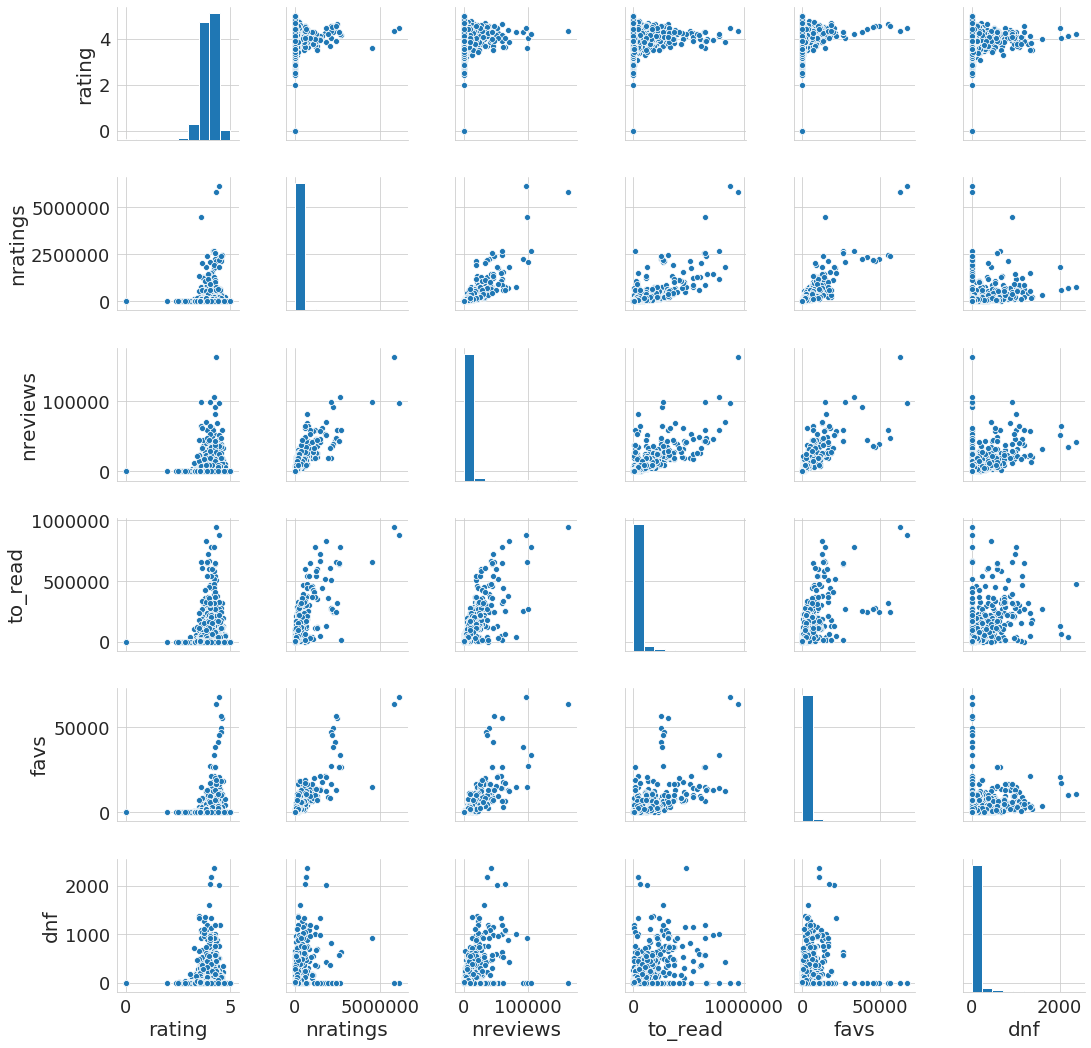

In [17]:
sns.pairplot(numerical_data)

Text(0.5, 0, 'log10(nratings)')

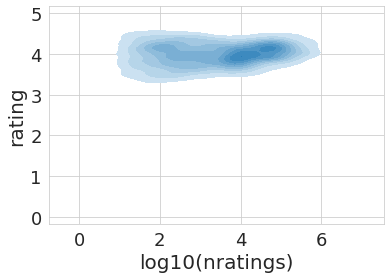

In [19]:
sns.kdeplot(np.log10(np.clip(numerical_data['nratings'], 1, None)), numerical_data['rating'], shade=True, shade_lowest=False)
plt.xlabel("log10(nratings)")

Text(0.5, 0, 'log10(nratings)')

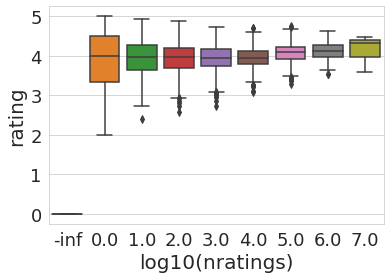

In [20]:
sns.boxplot(np.round(np.log10(numerical_data['nratings'])), numerical_data['rating'])
plt.xlabel("log10(nratings)")

/home/msimet/anaconda3/envs/goodreads/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/msimet/anaconda3/envs/goodreads/lib/python3.7/site-packages/numpy/linalg/linalg.py:1942: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


Text(0.5, 0, 'log10(nratings)')

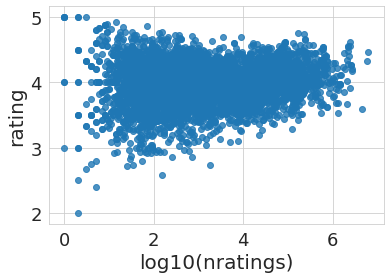

In [21]:
sns.regplot(np.log10(numerical_data['nratings']), numerical_data['rating'])
plt.xlabel("log10(nratings)")

Text(0.5, 0, 'log(nratings)')

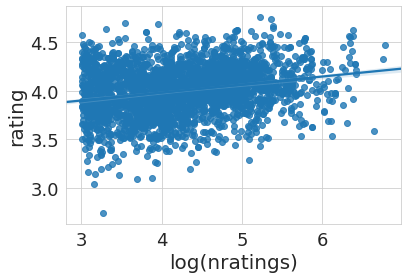

In [22]:
mask = np.log10(numerical_data['nratings'])>3
sns.regplot(np.log10(numerical_data['nratings'][mask]), numerical_data['rating'][mask])
plt.xlabel("log(nratings)")

In [23]:
query = "SELECT pubyear, nratings FROM works WHERE pubyear>2000"
pub_year_data = pd.read_sql_query(query, con)

Text(0, 0.5, 'log10(nratings)')

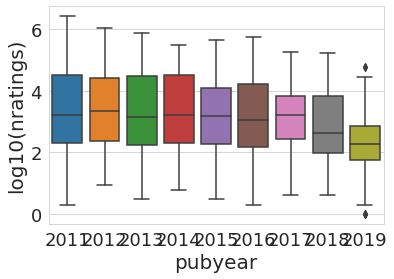

In [24]:
mask = pub_year_data['pubyear'] > 2010
sns.boxplot(pub_year_data['pubyear'][mask].astype(int), np.log10(pub_year_data['nratings'][mask]))
plt.xlim((plt.gca().get_xlim()[0], plt.gca().get_xlim()[1]-1))
plt.ylabel("log10(nratings)")

In [29]:
x = pub_year_data['pubyear']
y = np.log10(np.clip(pub_year_data['nratings'], 1, None))

/home/msimet/anaconda3/envs/goodreads/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'log10(nratings)')

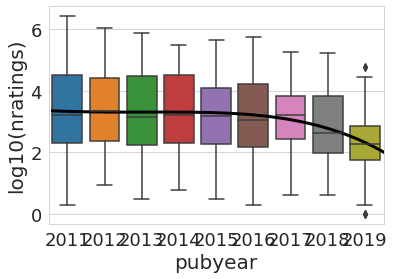

In [31]:
from numpy.polynomial import Polynomial
p = Polynomial.fit(x, y, 4)
sns.boxplot(pub_year_data['pubyear'][mask].astype(int), np.log10(pub_year_data['nratings'][mask]))
xp, yp = p.linspace()
maskp = xp>2010.5
xp -= 2011
plt.plot(xp[maskp], yp[maskp], color='black', lw=3)
plt.xlim((plt.gca().get_xlim()[0], plt.gca().get_xlim()[1]-1))
plt.ylabel("log10(nratings)")

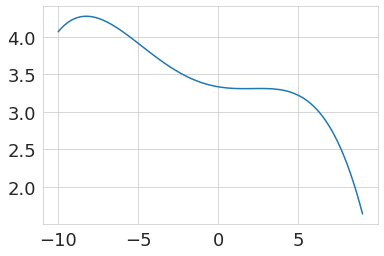

In [32]:
plt.plot(xp, yp)

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [127]:
query = ("SELECT nratings, fantasy, sf, horror, dystopian, romance, adventure, "+
         "urban_fantasy, mystery, historical,"+
         "high_fantasy, mythology, humor, literature, time_travel, space, id FROM works WHERE nratings>0")
genre_data = pd.read_sql_query(query, con)
ids = genre_data.pop('id')

In [128]:
genre_data_rescaled = np.array(genre_data.values, dtype=float)

In [129]:
print(type(genre_data_rescaled))
genre_data_rescaled /= genre_data_rescaled[:, 0].T[:, None]
genre_data_rescaled = genre_data_rescaled[:, 1:]
genre_data_rescaled[np.isinf(genre_data_rescaled)] = 0
genre_data_rescaled[np.isnan(genre_data_rescaled)] = 0

<class 'numpy.ndarray'>


In [130]:
if True:
    mms = MinMaxScaler()
    mms.fit(genre_data_rescaled)
    with open('genre_rescaler.p', 'wb') as f:
        pickle.dump(mms, f)
else:
    with open('genre_rescaler.p', 'rb') as f:
        mms = pickle.load(f)
data_transformed = mms.transform(genre_data_rescaled)


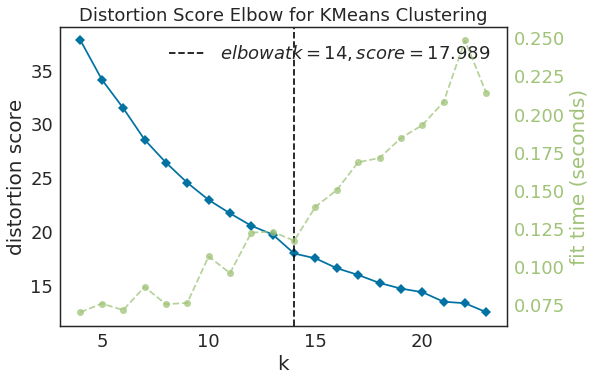

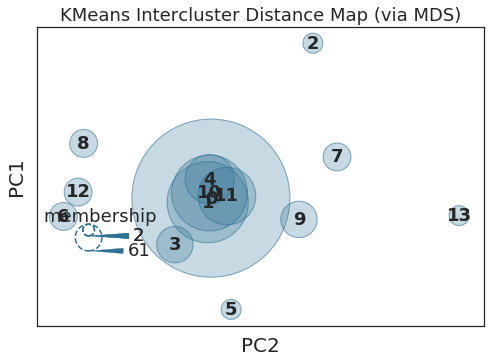

Starting len 4830 removing 11 clusters
Ending len 4714


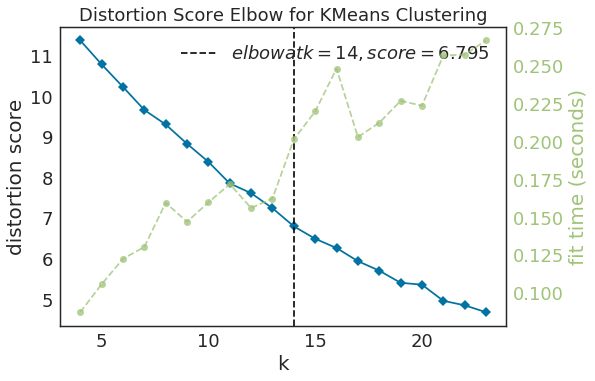

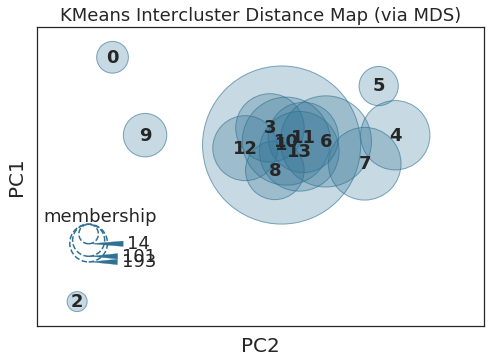

Starting len 4714 removing 10 clusters
Ending len 4099


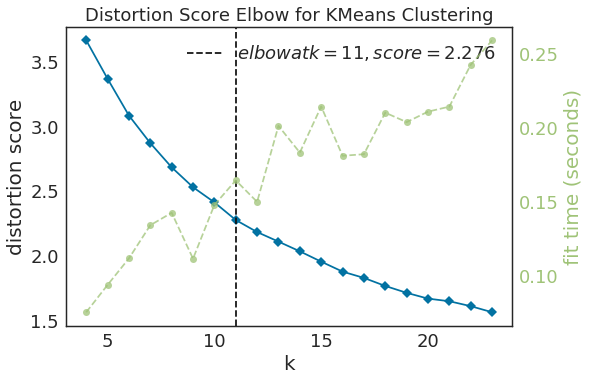

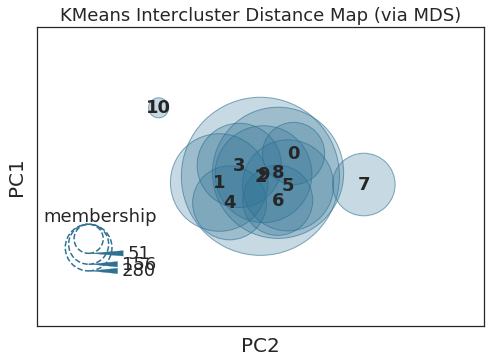

Starting len 4099 removing 5 clusters
Ending len 3816


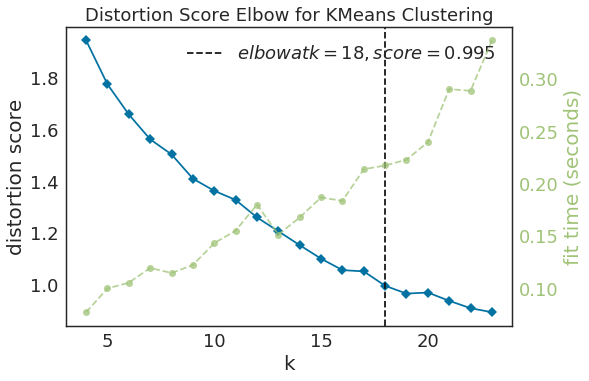

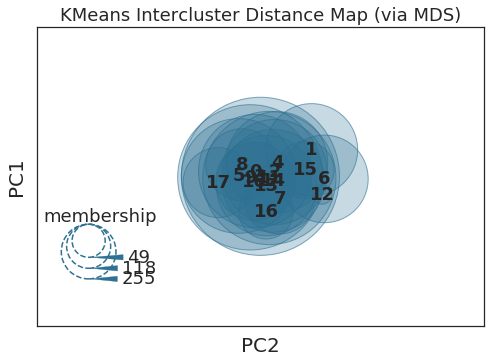

Starting len 3816 removing 8 clusters
Ending len 3428


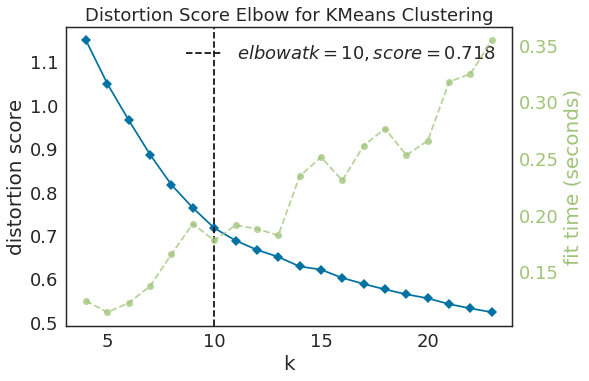

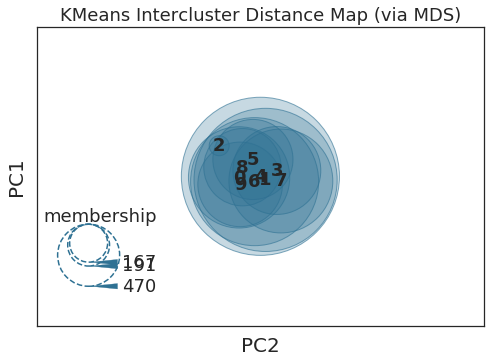

In [131]:
size_of_clusters=[1]
min_size = int(0.03*len(data_transformed))

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import InterclusterDistance
from collections import Counter

model = None
masked_data = data_transformed

if True:
    while np.min(size_of_clusters)<min_size:
        if model is not None:
            remove_clusters = [i for i, c in enumerate(size_of_clusters) if c<min_size]
            print("Starting len", len(masked_data), "removing", len(remove_clusters), "clusters")
            for i in remove_clusters:
                mask = labels!=i
                labels = labels[mask]
                masked_data = masked_data[mask]
                ids = ids[mask]
            print("Ending len", len(masked_data))
            min_size = int(0.03*len(masked_data))

        # Instantiate the clustering model and visualizer
        model = KMeans()
        visualizer = KElbowVisualizer(model, k=(4,24))

        visualizer.fit(masked_data)        # Fit the data to the visualizer
        visualizer.poof()        # Draw/show/poof the data
        ngenres = visualizer.elbow_value_

        model = KMeans(ngenres)
        visualizericl = InterclusterDistance(model)

        visualizericl.fit(masked_data)        # Fit the data to the visualizer
        visualizericl.poof()

        labels = model.predict(masked_data)
        label_counter = Counter(labels)
        size_of_clusters = [label_counter[i] for i in range(ngenres)]


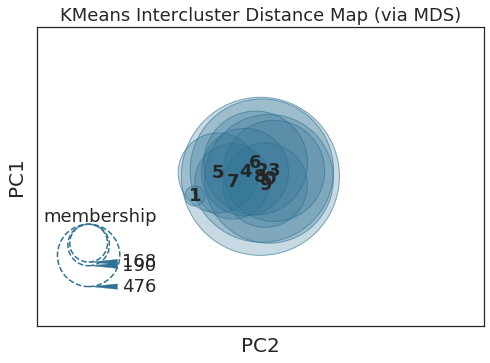

In [132]:
if True:
    ngenres = visualizer.elbow_value_
    model = KMeans(ngenres)
    visualizer = InterclusterDistance(model)

    visualizer.fit(masked_data)        # Fit the data to the visualizer
    visualizer.poof()
    with open('genre_classifier.p', 'wb') as f:
        pickle.dump(model, f)
    np.save('ngenres.npy', ngenres)
else:
    ngenres = np.load('ngenres.npy')
    with open('genre_classifier.p', 'rb') as f:
        model = pickle.load(f)
    #visualizer = InterclusterDistance(model)
    #visualizer.poof()

labels = model.predict(masked_data)

In [133]:
query = ("SELECT id, title, author FROM works")
title_data = pd.read_sql_query(query, con)


In [134]:
title_data['prettystring'] = title_data.apply(lambda x: '{} by {}'.format(x.title, x.author), axis=1)
title_data = title_data[title_data['id'].isin(ids)]

In [163]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    for label in range(ngenres):
        print(f"Group {label}")
        mask = labels==label
        print(title_data['prettystring'][mask])

Group 0
0                       Pawn of Prophecy by David Eddings
21                      The Dragon Thief by Zetta Elliott
24                   The Last Threshold by R.A. Salvatore
30                        The Black Mage by Daniel Barnes
34                           Spirit's End by Rachel Aaron
65                 Polgara the Sorceress by David Eddings
66          Sea Devil's Eye: Forgotten Realms by Mel Odom
72                      River of Stars by Guy Gavriel Kay
87             A Darkness At Sethanon by Raymond E. Feist
88                       The Blue Sword by Robin McKinley
105                      King of Thorns by Mark  Lawrence
118                            Zonderling by Laini Taylor
124               Red Seas Under Red Skies by Scott Lynch
128                          Magician by Raymond E. Feist
129                       Black Powder War by Naomi Novik
141                    The Last Wish by Andrzej Sapkowski
156                                 The Wolf by Leo Carew
168   

In [136]:
centroids = model.cluster_centers_
genres = np.array([g for g in genre_data][1:])
avg_centroid = np.mean(centroids, axis=0)
with open('genre_defs.txt', 'w') as f:
    for i, centroid in enumerate(centroids):
        f.write(f"Group {i}\n")
        print(f"Group {i}")
        weights = np.mean(masked_data[labels==i], axis=0)
        weighted_centroid = weights*centroid
        cdiff = centroid-avg_centroid
        order = np.argsort(cdiff)[::-1]
        for j, (g, c) in enumerate(zip(genres[order], cdiff[order])):
            if j>4:
                continue
            print(f"{g}: {100*c:.3f}")
            f.write(f"{g}: {100*c:.3f}\n")
            

Group 0
fantasy: 0.891
high_fantasy: 0.755
historical: 0.041
mythology: 0.009
literature: -0.029
Group 1
romance: 5.431
urban_fantasy: 2.207
humor: 0.167
mystery: 0.125
historical: 0.074
Group 2
sf: 0.803
space: 0.092
time_travel: 0.022
literature: 0.006
historical: -0.057
Group 3
dystopian: 1.750
sf: 0.238
literature: 0.037
horror: -0.035
time_travel: -0.038
Group 4
mystery: 1.856
horror: 0.346
literature: 0.076
historical: 0.017
humor: 0.008
Group 5
romance: 2.208
urban_fantasy: 0.208
fantasy: 0.094
mythology: 0.083
time_travel: 0.049
Group 6
space: 2.002
sf: 0.928
time_travel: -0.029
literature: -0.034
humor: -0.047
Group 7
urban_fantasy: 1.935
mystery: 0.148
horror: 0.105
romance: 0.083
fantasy: 0.050
Group 8
literature: 0.049
horror: 0.028
historical: 0.005
mythology: -0.004
time_travel: -0.016
Group 9
adventure: 1.980
fantasy: 0.243
humor: 0.067
historical: 0.053
mythology: 0.049


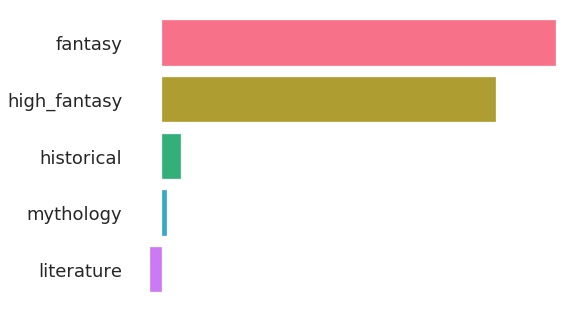

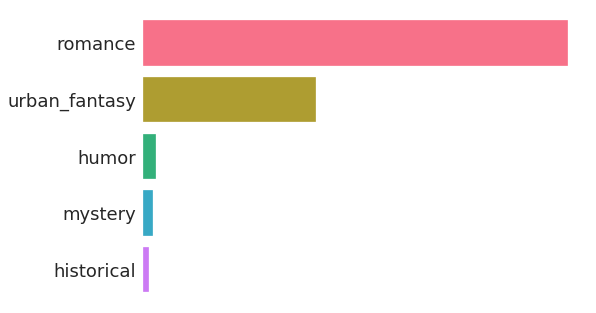

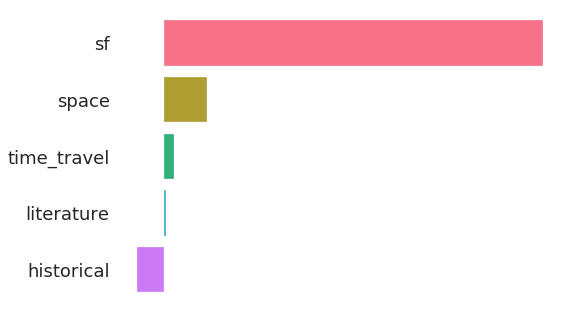

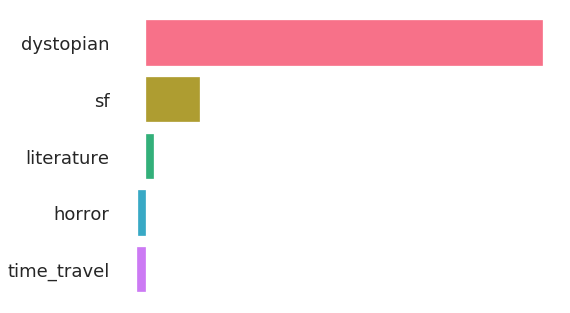

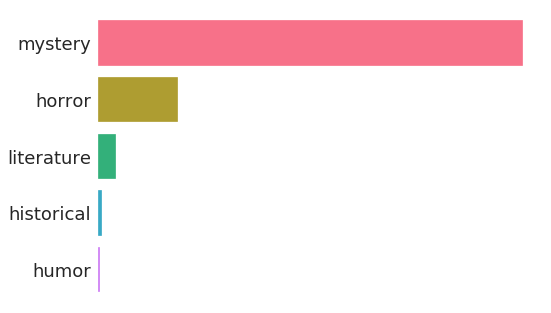

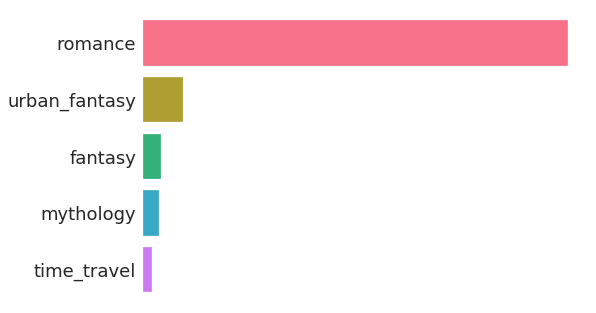

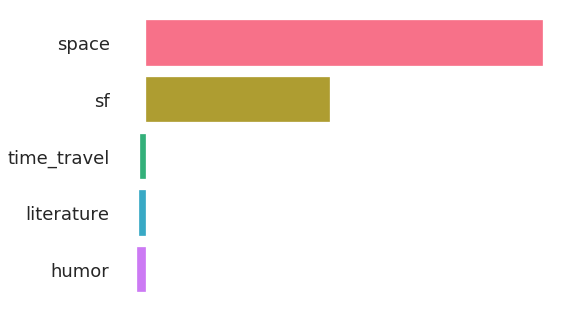

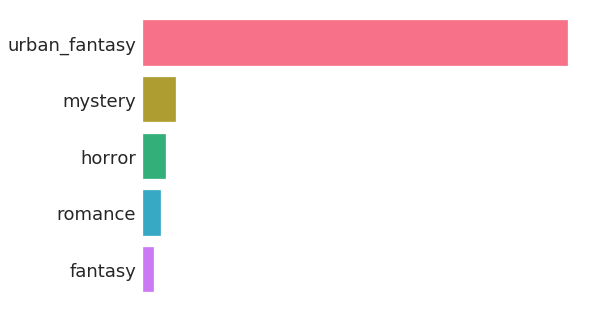

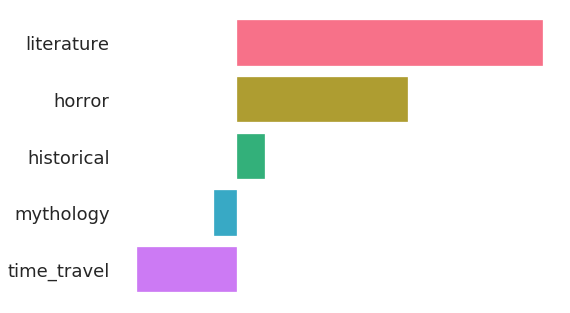

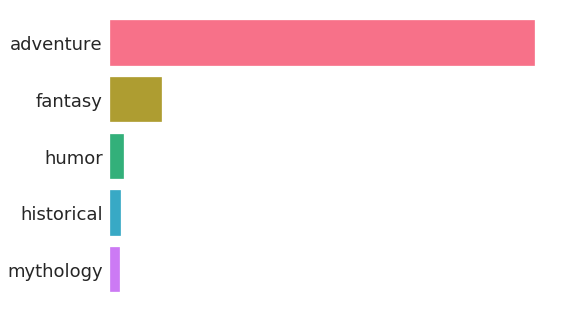

In [137]:
sns.set_style('white')
with sns.color_palette("husl", 5):
    for i, centroid in enumerate(centroids):
        cdiff = centroid - avg_centroid
        fig = plt.figure()
        order = np.argsort(cdiff)[::-1]
        tick_labels = genres[order][:5]
        for j, (g, c) in enumerate(zip(genres[order], cdiff[order])):
            if j>4:
                continue
            plt.barh(5-j, c)
        sns.despine(left=True, bottom=True)
        plt.yticks([5,4,3,2,1], tick_labels)
        fig.gca().get_xaxis().set_visible(False)

In [169]:
query = ("SELECT * FROM works WHERE nratings>0")
all_data = pd.read_sql_query(query, con)

In [170]:
import scipy.spatial.distance
distances = {}
for i, genre in enumerate(centroids):
    distances['genre{}'.format(i)] = [scipy.spatial.distance.cosine(book, genre) for book in data_transformed]



In [166]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,learning_rate=300,perplexity = 30,early_exaggeration = 12,init = 'random',  random_state=2019)
X_tsne = tsne.fit_transform(masked_data)
print(X_tsne.shape)

(3428, 2)


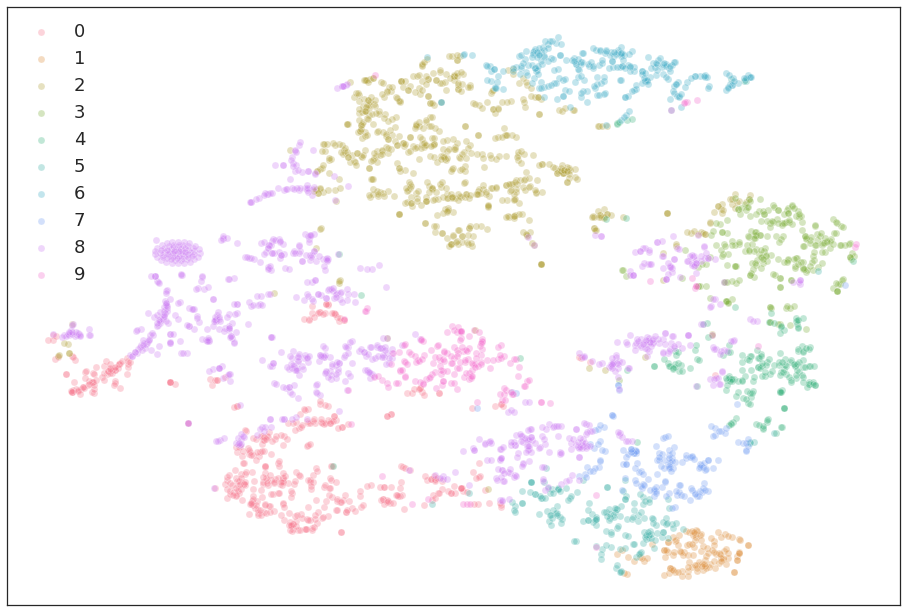

In [181]:
fig = plt.figure()
figsize = fig.get_size_inches()
plt.close(fig)
with sns.color_palette("husl", ngenres):
    fig = plt.figure(figsize=[2*figsize[0], 2*figsize[1]])
    for i in range(ngenres):
        mask = labels==i
        sns.scatterplot(X_tsne[mask,0], X_tsne[mask, 1], alpha=0.3, label=str(i))
    plt.yticks([], [])
    plt.xticks([], [])#plt.xlim((-0.05, 0.2))
    plt.legend()
    
#plt.ylim((-0.07, 0.2))

In [172]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(username, password, host, port, db_name))
for key in distances:
    all_data[key] = distances[key]
    
all_data = all_data.drop(columns=["fantasy", "sf", "horror", "dystopian", "romance", 
                                  "adventure", "urban_fantasy", "mystery", "historical",
                                  "high_fantasy", "mythology", "humor", "literature", 
                                  "time_travel", "space", "lgbt"])

all_data.to_sql('works_withgenre', engine) 

In [122]:
years = [2019,2018,2017,2016,2015,2014]
nnoms = [1800,1534,2078,3695,2122,1923]
nvotes = [3097,2828,3319,3130,5950,3587]

Text(0.5, 0, 'Year')

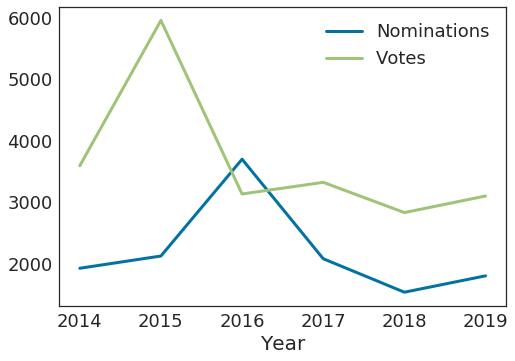

In [123]:
sns.lineplot(years, nnoms, label='Nominations', lw=3)
sns.lineplot(years, nvotes, label='Votes', lw=3)
#plt.legend()
plt.xlabel("Year")

Normalized confusion matrix
[[0.95 0.05]
 [0.27 0.73]]
[[0.05 0.95]
 [0.73 0.27]]


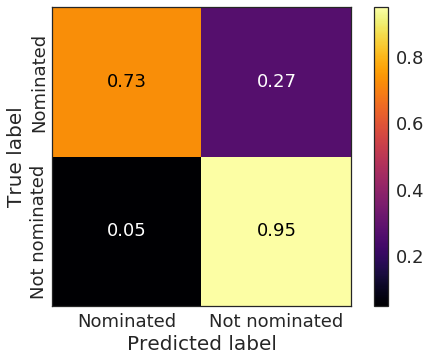

In [185]:
y_true = np.concatenate([[1]*(16+6) + [0]*(16+305)])
y_pred = np.concatenate([[1]*16 + [0]*6 + [1]*16 + [0]*305])


from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    cm = cm[:, ::-1]
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes[::-1], yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
#    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#             rotation_mode="anchor")
    plt.setp(ax.get_yticklabels(), rotation=90, ha="center",
             rotation_mode="anchor")
    ax.tick_params(axis='y', which='major', pad=15)
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] < thresh else "black")
    ax.set_aspect('equal')
    ax.set_xlim((-0.5, 1.5))
    ax.set_ylim((-0.5, 1.5))
#    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plot_confusion_matrix(y_test, y_pred, classes=class_names,
#                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=np.array(['Not nominated', 'Nominated']), normalize=True, cmap='inferno')

plt.show()